<a href="https://colab.research.google.com/github/filladani/PCVK_2024/blob/main/week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import numpy as np
import PIL
import io
import html
import time

# No 2

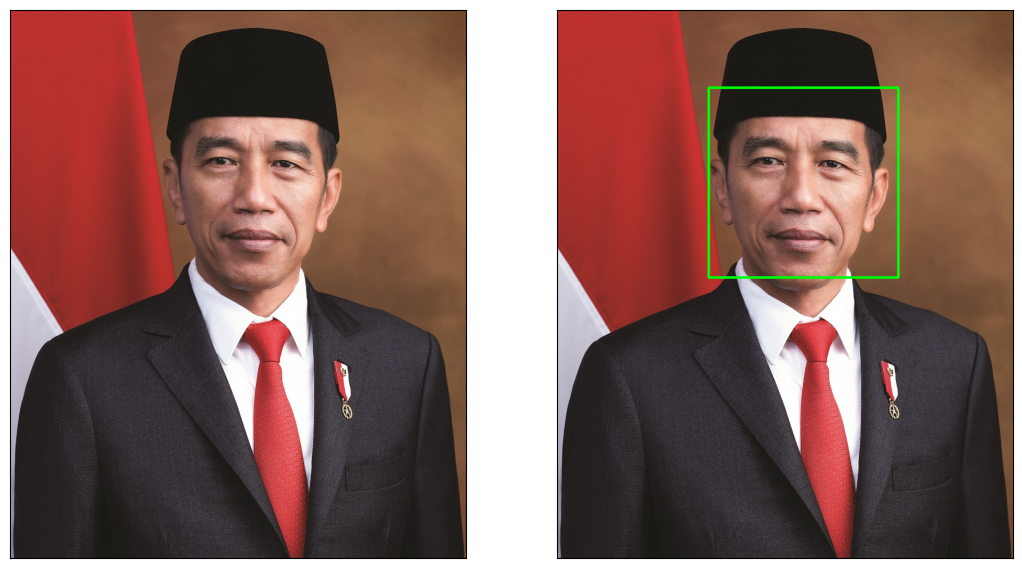

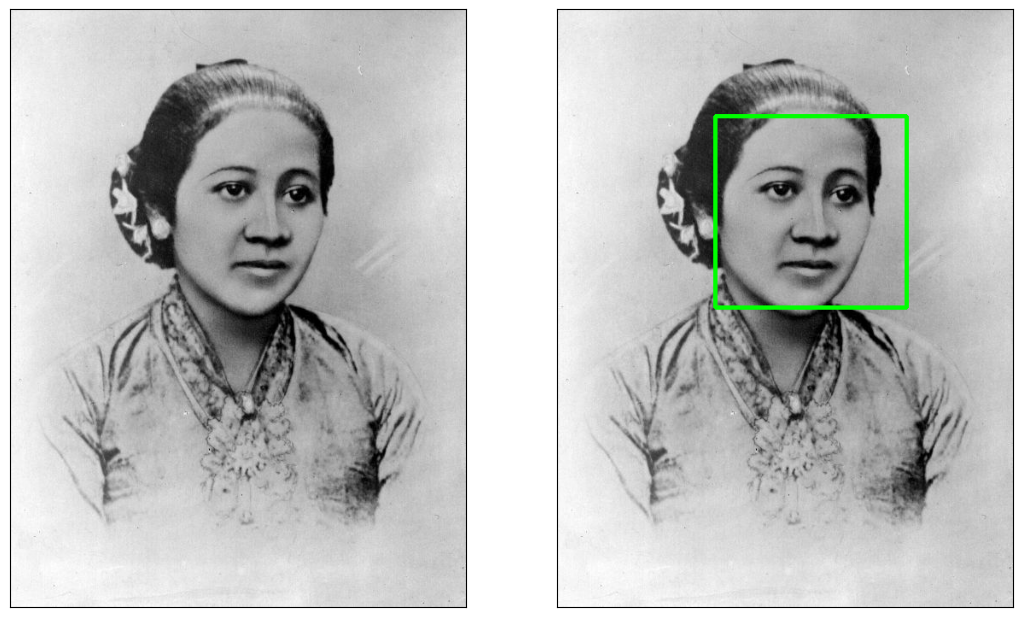

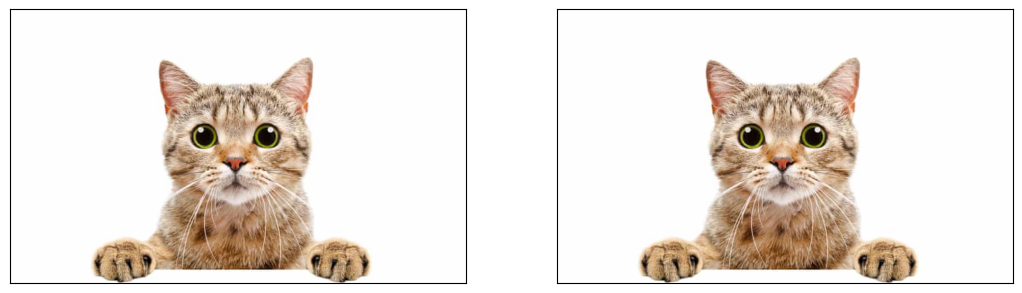

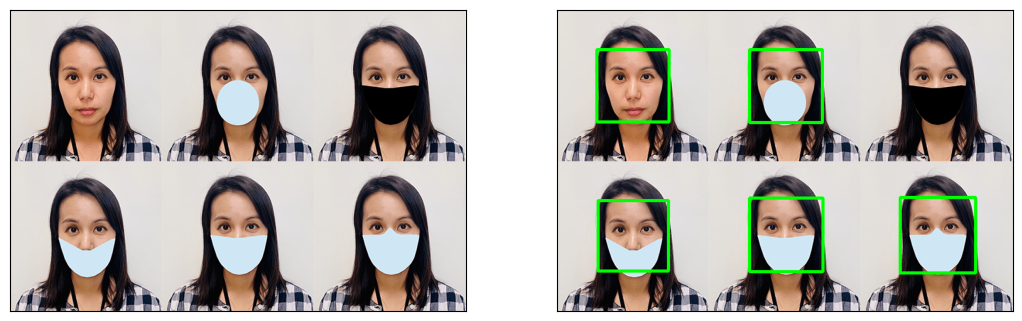

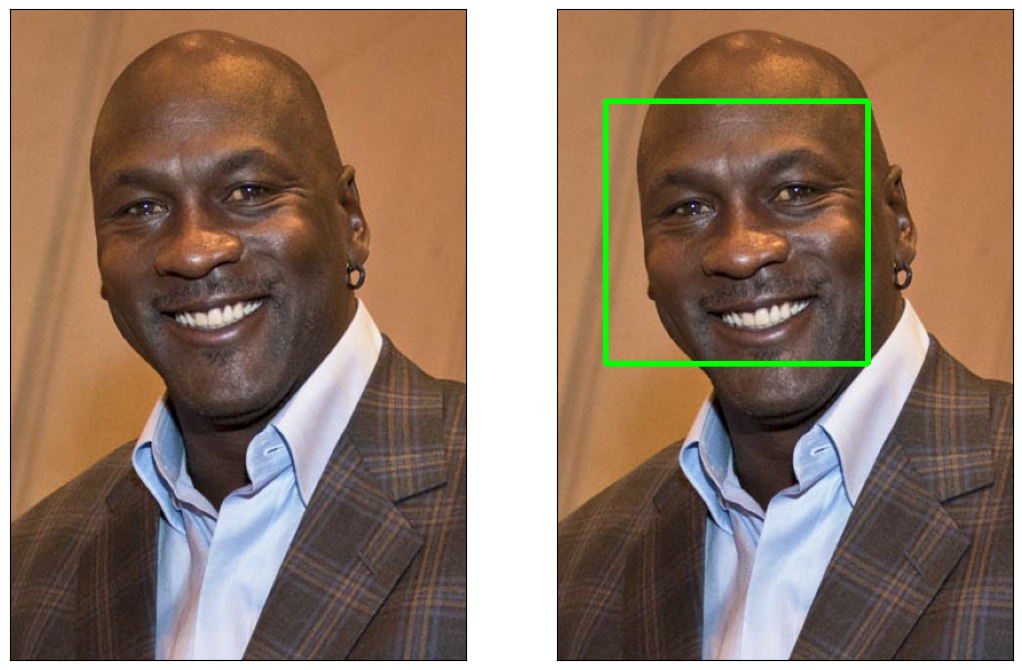

In [5]:
from matplotlib import image
def face_detect(image_path):
  cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascades/haarcascade_frontalface_alt.xml')
  img = cv.imread(image_path)
  original = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  roi_wajah = cascade_wajah.detectMultiScale(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  for(x,y,w,h) in roi_wajah:
   cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
  plt.figure(figsize=(20,15))
  plt.subplot(131),plt.imshow(original)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132),plt.imshow(img)
  plt.xticks([]), plt.yticks([])
  plt.show()

image_path=[
    '/content/drive/MyDrive/PCVK/images/jokowi.jpg',
    '/content/drive/MyDrive/PCVK/images/kartini.jpg',
    '/content/drive/MyDrive/PCVK/images/kucing.jpg',
    '/content/drive/MyDrive/PCVK/images/mask.png',
    '/content/drive/MyDrive/PCVK/images/mjordan.jpg',
]

for image_path in image_path:
    face_detect(image_path)

# No 3

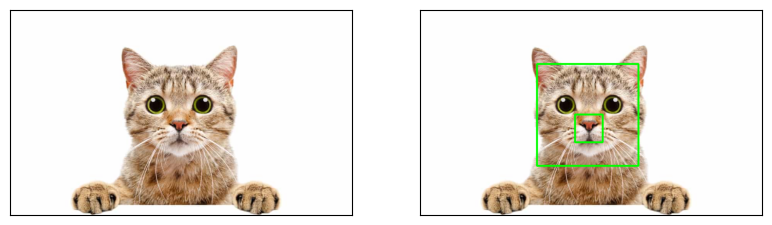

In [6]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascades/haarcascade_frontalcatface_extended.xml')
img = cv.imread('/content/drive/MyDrive/PCVK/images/kucing.jpg')
original = cv.cvtColor(img, cv.COLOR_BGR2RGB)
kucing = cv.cvtColor(img, cv.COLOR_BGR2RGB)
roi_wajah = cascade_wajah.detectMultiScale(cv.cvtColor(kucing, cv.COLOR_BGR2RGB))
for(x,y,w,h) in roi_wajah:
 cv.rectangle(kucing,(x,y),(x+w,y+h),(0,255,0),3)

plt.figure(figsize=(15,15))
plt.subplot(131),plt.imshow(original)
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(kucing)
plt.xticks([]), plt.yticks([])
plt.show()

# No 4

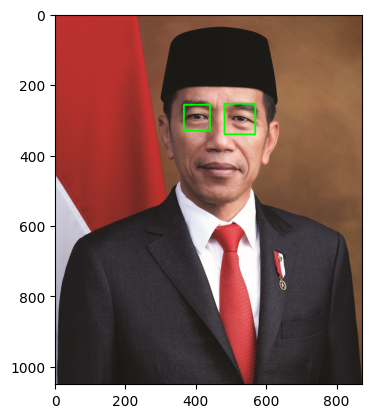

In [7]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascades/haarcascade_eye.xml')
img = cv.imread('/content/drive/MyDrive/PCVK/images/jokowi.jpg')
jokowi = cv.cvtColor(img, cv.COLOR_BGR2RGB)
roi_wajah = cascade_wajah.detectMultiScale(cv.cvtColor(jokowi, cv.COLOR_BGR2RGB))
for(x,y,w,h) in roi_wajah:
 cv.rectangle(jokowi,(x,y),(x+w,y+h),(0,255,0),3)

plt.imshow(jokowi)

# No 5

In [8]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [9]:
# initialize the Haar Cascade face detection model
face_cascade = cv.CascadeClassifier(cv.samples.findFile(cv.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [10]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


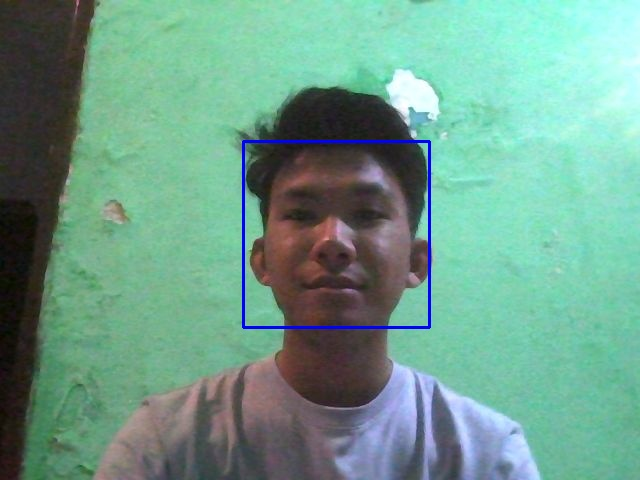

In [12]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [13]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [15]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

# No 6

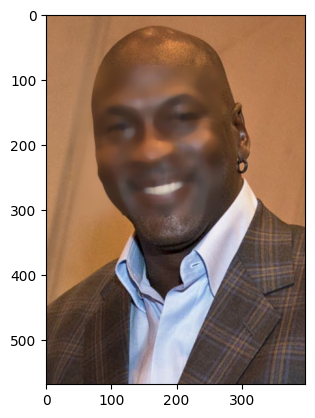

In [16]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascades/haarcascade_frontalface_alt.xml')
img = cv.imread('/content/drive/MyDrive/PCVK/images/mjordan.jpg')
jordan = cv.cvtColor(img, cv.COLOR_BGR2RGB)
roi_wajah = cascade_wajah.detectMultiScale(cv.cvtColor(jordan, cv.COLOR_BGR2RGB))
for (x, y, w, h) in roi_wajah:
    roi = jordan[y:y+h, x:x+w]
    blur = cv.medianBlur(roi, ksize=15)
    jordan[y:y+h, x:x+w] = blur

plt.imshow(jordan)

# No 7

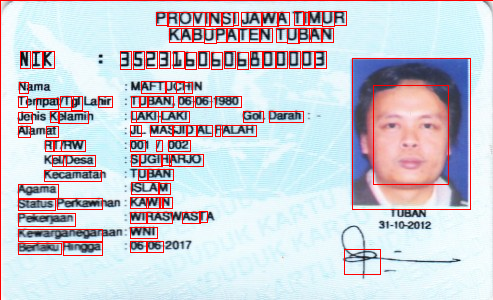

In [17]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import morphology

ktp = cv2.imread('/content/drive/MyDrive/PCVK/images/ktp3.png')

blurred = cv2.GaussianBlur(ktp, (21,21), 0.5)
sharpened2 = cv2.addWeighted(ktp, 1.5, blurred,-0.5,0)
gray2 = cv2.cvtColor(sharpened2, cv2.COLOR_BGR2GRAY)
ret2, bw2 = cv2.threshold(gray2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((2,2),np.uint8)
morphology = cv2.morphologyEx(bw2, cv2.MORPH_CLOSE, kernel)
contours2, _ = cv2.findContours(morphology, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for contour in contours2:
  x, y, w, h = cv2.boundingRect(contour)
  if(w>3 and h>10):
    result2 = cv2.rectangle(ktp, (x, y), (x+w, y+h),(0,0,255),1)

cv2_imshow(result2)

# No 8

In [20]:
crop_image = result2[50:70, 120:300]
cv2_imshow(crop_image)

# No 9

In [26]:
# Load dataset MNIST
import tensorflow as tf # Import tensorflow for accessing keras

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data() # Use tf.keras to access the mnist object

# Preprocessing data
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0  # Normalisasi [0, 1]
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

# Simpan dataset ke pickle
with open("X_train.pickle", "wb") as pickle_out:
    pickle.dump(X_train, pickle_out)
with open("Y_train.pickle", "wb") as pickle_out:
    pickle.dump(Y_train, pickle_out)
with open("X_test.pickle", "wb") as pickle_out:
    pickle.dump(X_test, pickle_out)
with open("Y_test.pickle", "wb") as pickle_out:
    pickle.dump(Y_test, pickle_out)

print("MNIST dataset telah diproses dan disimpan ke pickle!")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
MNIST dataset telah diproses dan disimpan ke pickle!


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")  # 10 output untuk digit 0-9
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 32ms/step - accuracy: 0.9071 - loss: 0.2985 - val_accuracy: 0.9843 - val_loss: 0.0505
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - accuracy: 0.9857 - loss: 0.0463 - val_accuracy: 0.9887 - val_loss: 0.0321
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9908 - loss: 0.0290 - val_accuracy: 0.9895 - val_loss: 0.0338
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9939 - loss: 0.0182 - val_accuracy: 0.9905 - val_loss: 0.0327
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 31ms/step - accuracy: 0.9958 - loss: 0.0132 - val_accuracy: 0.9925 - val_loss: 0.0270
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9968 - loss: 0.0103 - val_accuracy: 0.9901 - val_loss: 0.0346
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9967 - loss: 0.0096 - val_accuracy: 0.9908 - val_loss: 0.0338
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9978 -

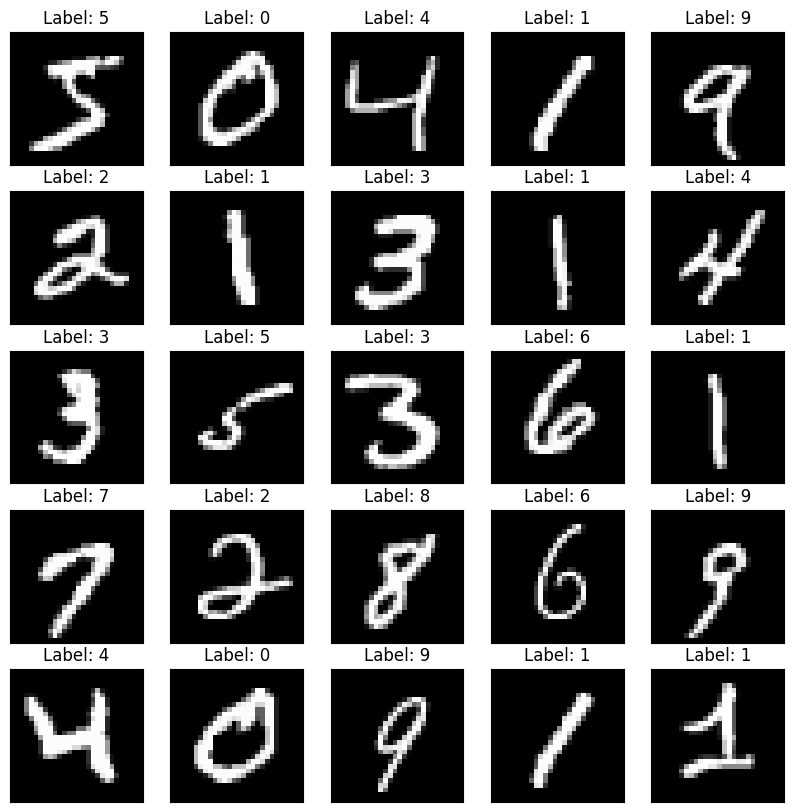

In [28]:
import matplotlib.pyplot as plt

# menampilkan beberapa gambar
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {Y_train[i]}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted label: 7


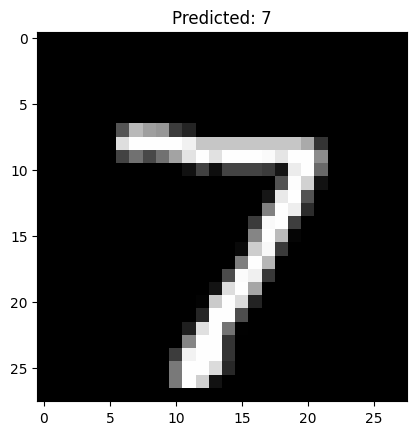

In [29]:
# Prediksi menggunakan data testing gambar pertama
predictions = model.predict(X_test[:1])
predicted_label = np.argmax(predictions)

print(f"Predicted label: {predicted_label}")
plt.imshow(X_test[0].reshape(28, 28), cmap="gray")
plt.title(f"Predicted: {predicted_label}")
plt.show()

# Tugas

In [30]:
!apt-get update
!apt-get install -y tesseract-ocr

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,113 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,613 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jamm

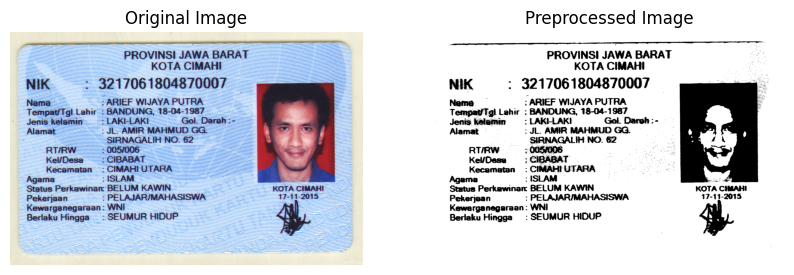

File: ktp2.png, NIK: 3217061804870007


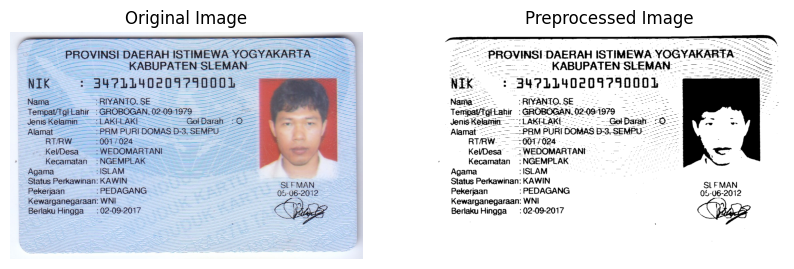

File: ktp.png, NIK: 3472140209790001


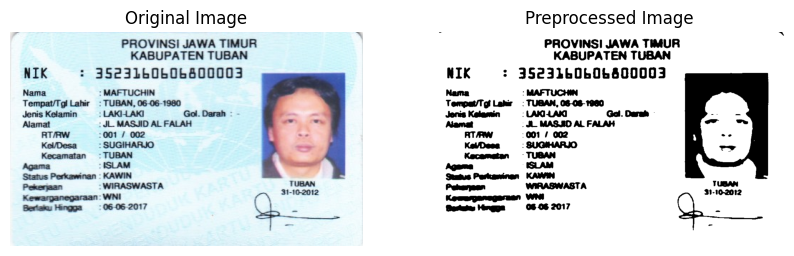

File: ktp4.png, NIK: 3523160606800003


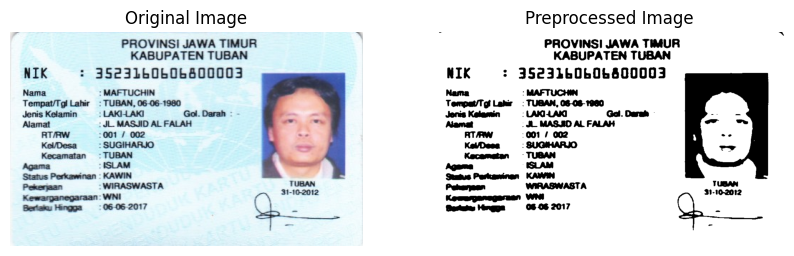

File: ktp3.png, NIK: 3523160606800003


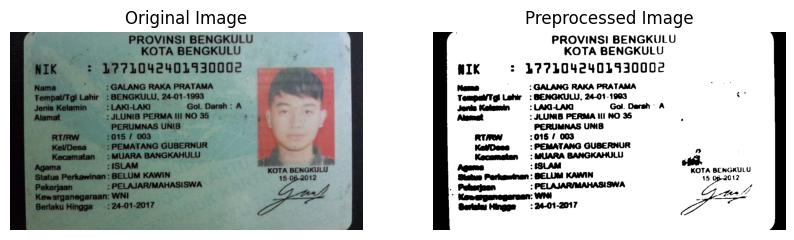

File: ktp1.png, NIK: 4771042401930002


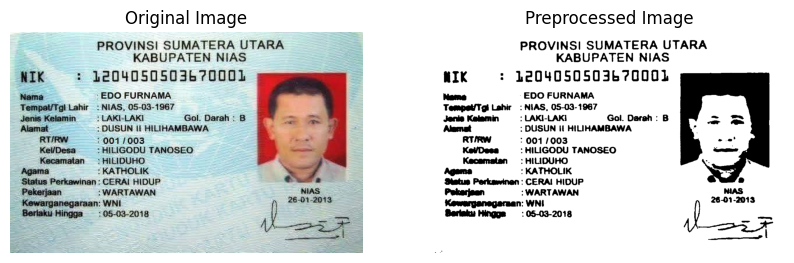

File: ktp5.png, NIK: 1204050503670001


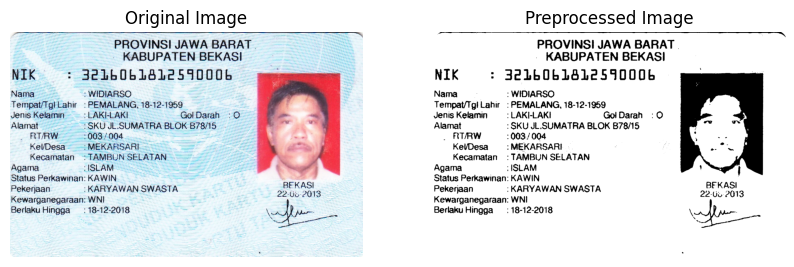

File: ktp6.png, NIK: 3216061812510001


In [32]:
!pip install pytesseract
import pytesseract
import cv2 as cv
import matplotlib.pyplot as plt
import re
import os
import numpy as np

directory_path = '/content/drive/MyDrive/PCVK/images/KTP_More'
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

def extract_nik_from_image(image_path):
    try:
        img = cv.imread(image_path)
        img_resized = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)

        # Preprocessing
        gray = cv.cvtColor(img_resized, cv.COLOR_BGR2GRAY)
        blurred_img = cv.GaussianBlur(gray, (5, 5), 0)
        ret, bw = cv.threshold(blurred_img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

        plt.figure(figsize=(10,10))
        plt.subplot(1, 2, 1)
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(bw, cmap='gray')
        plt.title("Preprocessed Image")
        plt.axis('off')
        plt.show()

        # OCR menggunakan Tesseract
        text = pytesseract.image_to_string(bw, lang='eng', config='--psm 11 --oem 3')
        text = text.replace('O', '0').replace('I', '1') \
        .replace('i', '1').replace('L', '1').replace('l', '1') \
        .replace('b', '6').replace('S', '5').replace('c', '2') \
        .replace('J', '3').replace('E', '8').replace('e', '2')
        # print("Detected Text:", text)

        # Regex
        nik = re.search(r'\b\d{16,16}\b', text)
        if nik:
            return nik.group()
        else:
            return "NIK not found"
    except Exception as e:
        return f"Error processing image {image_path}: {e}"

for filename in os.listdir(directory_path):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        file_path = os.path.join(directory_path, filename)
        nik = extract_nik_from_image(file_path)
        print(f"File: {filename}, NIK: {nik}")